In [1]:
# Import modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(
    Path('../2_resource/ml_inspection_data/InspectionList3.csv')   
)

# Review the DataFrame
df

,Seg_ID,UP_MH,DS_MH,Dia_Inch,Shape,Material,Length_Ft,MWL,DS,defects,Video Quality,Jurisdiction,risk score,Inspection_cycle
0,1.0,118.2,117.0,30,Circular,RCP,222.0,55,0.12,SAV,Good,Dulles Aiport,5,1
1,1.5,118.2,117.0,30,Circular,RCP,222.0,55,0.12,SAV,Good,Dulles Aiport,5,1
2,2.0,117.0,116.0,30,Circular,RCP,248.0,25,0.20,SAV,Good,Dulles Aiport,2,9
3,2.5,117.0,116.0,30,Circular,RCP,248.0,25,0.20,SAV,Good,Dulles Aiport,2,9
4,3.0,116.0,115.8,30,Circular,RCP,209.0,25,0.00,SAV,Good,Dulles Aiport,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,225.0,36206.0,36207.0,60,Circular,DIP,200.0,95,0.00,SRC,Poor,DC,5,1
493,226.0,36206.0,36207.0,42,Circular,DIP,200.0,95,0.00,SAV,Poor,DC,1,3
494,227.0,36184.0,36184.5,108,Circular,RCP,341.0,30,0.00,SRP,NaN,DC,4,9
495,228.0,37500.0,36184.0,108,Circular,RCP,212.5,30,0.00,SRP,NaN,DC,4,9


### 2. Separate the features `X` from the target `y`

In [3]:
# Seperate the features, X,  from the target variable, y
y = df['risk score']
X = df.drop(columns='risk score')

In [4]:
# Preview the features data
X.head()

,Seg_ID,UP_MH,DS_MH,Dia_Inch,Shape,Material,Length_Ft,MWL,DS,defects,Video Quality,Jurisdiction,Inspection_cycle
0,1.0,118.2,117.0,30,Circular,RCP,222.0,55,0.12,SAV,Good,Dulles Aiport,1
1,1.5,118.2,117.0,30,Circular,RCP,222.0,55,0.12,SAV,Good,Dulles Aiport,1
2,2.0,117.0,116.0,30,Circular,RCP,248.0,25,0.20,SAV,Good,Dulles Aiport,9
3,2.5,117.0,116.0,30,Circular,RCP,248.0,25,0.20,SAV,Good,Dulles Aiport,9
4,3.0,116.0,115.8,30,Circular,RCP,209.0,25,0.00,SAV,Good,Dulles Aiport,9


In [5]:
y.value_counts()

risk score
2    170
3    150
4     69
1     64
5     44
Name: count, dtype: int64

In [6]:
# Preview the first five entries for the target variable
y[:10]

0    5
1    5
2    2
3    2
4    2
5    2
6    2
7    2
8    3
9    3
Name: risk score, dtype: int64

### 3. Encode the categorical variables from the features data using `get_dummies`.

In [7]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [8]:
# Review the features data
X.head()

,Seg_ID,UP_MH,DS_MH,Dia_Inch,Length_Ft,MWL,DS,Inspection_cycle,Shape_Arched,Shape_C,...,Video Quality_Good,Video Quality_Poor,Jurisdiction_DC,Jurisdiction_Difficult Run,Jurisdiction_Dulles Aiport,Jurisdiction_Loudoun,"Jurisdiction_MD, CB, PKWY",Jurisdiction_Sugarland run,"Jurisdiction_VA, Great Falls",Jurisdiction_Watts&muddy
0,1.0,118.2,117.0,30,222.0,55,0.12,1,False,False,...,True,False,False,False,True,False,False,False,False,False
1,1.5,118.2,117.0,30,222.0,55,0.12,1,False,False,...,True,False,False,False,True,False,False,False,False,False
2,2.0,117.0,116.0,30,248.0,25,0.20,9,False,False,...,True,False,False,False,True,False,False,False,False,False
3,2.5,117.0,116.0,30,248.0,25,0.20,9,False,False,...,True,False,False,False,True,False,False,False,False,False
4,3.0,116.0,115.8,30,209.0,25,0.00,9,False,False,...,True,False,False,False,True,False,False,False,False,False


### 4. Separate the data into training and testing subsets.

In [9]:
# Split the dataset using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### 5. Scale the data using `StandardScaler`

In [10]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

### 6. Instantiate an K Nearest Neighbor Classifier instance.

In [11]:
# Import the KNeighborsClassifier module from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNeighborsClassifier model with n_neighbors = 3 
knn = KNeighborsClassifier(n_neighbors=3)

### 7. Fit the model using the training data.

In [12]:
# Train the model using the training data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

### 8. Make predictions using the testing data.

In [13]:
# Create predictions using the testing data
y_pred = knn.predict(X_test_scaled)

### 9. Generate the classification report for the test data.

In [14]:
# Print the classification report comparing the testing data to the model predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       0.70      0.78      0.74        45
           3       0.67      0.83      0.74        36
           4       0.82      0.47      0.60        19
           5       1.00      0.30      0.46        10

    accuracy                           0.74       125
   macro avg       0.82      0.68      0.70       125
weighted avg       0.76      0.74      0.72       125



In [15]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, y_pred)
print(f"confusion Matrix: \n {cm}")
print(f"Accuracy: {acc_score}")

confusion Matrix: 
 [[15  0  0  0  0]
 [ 0 35  9  1  0]
 [ 0  6 30  0  0]
 [ 0  8  2  9  0]
 [ 1  1  4  1  3]]
Accuracy: 0.736


In [16]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 125, 2: 125, 3: 125, 5: 125, 4: 125})


In [17]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_res, y_res)
y_pred = knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       0.73      0.78      0.75        45
           3       0.72      0.86      0.78        36
           4       0.83      0.53      0.65        19
           5       0.86      0.60      0.71        10

    accuracy                           0.78       125
   macro avg       0.83      0.75      0.78       125
weighted avg       0.79      0.78      0.77       125



In [18]:
# Calculating the confusion matrix
cm2 = confusion_matrix(y_test, y_pred)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, y_pred)
print(f"confusion Matrix: \n {cm2}")
print(f"Accuracy: {acc_score}")

confusion Matrix: 
 [[15  0  0  0  0]
 [ 0 35  9  1  0]
 [ 0  5 31  0  0]
 [ 0  7  1 10  1]
 [ 0  1  2  1  6]]
Accuracy: 0.776


## Feature Importance

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [24]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [25]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.151880440445677, 'Seg_ID'),
 (0.1351558577512984, 'Inspection_cycle'),
 (0.12122322801182442, 'DS_MH'),
 (0.11730556931450951, 'UP_MH'),
 (0.09413821739342199, 'Length_Ft'),
 (0.06669630110431853, 'Dia_Inch'),
 (0.05779296537058442, 'MWL'),
 (0.030483663100776916, 'defects_SRP'),
 (0.029045119310153047, 'defects_SAM'),
 (0.026428046126059913, 'defects_SAV'),
 (0.025407011583989888, 'DS'),
 (0.015442131589349303, 'Video Quality_Poor'),
 (0.014448041140389447, 'defects_SAP'),
 (0.014181877733154886, 'defects_SRC'),
 (0.011676227854596752, 'Video Quality_Good'),
 (0.010885423429649696, 'defects_SRV'),
 (0.010344951034227862, 'Jurisdiction_Loudoun'),
 (0.009441087787802024, 'Jurisdiction_Watts&muddy'),
 (0.008359215507416995, 'Jurisdiction_MD, CB, PKWY'),
 (0.00832785380265821, 'Jurisdiction_Dulles Aiport'),
 (0.008000131847835056, 'Jurisdiction_Sugarland run'),
 (0.007649311998575468, 'Jurisdiction_Difficult Run'),
 (0.005314737833426905, 'Shape_Circular'),
 (0.005114791731273294, 'Sh

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

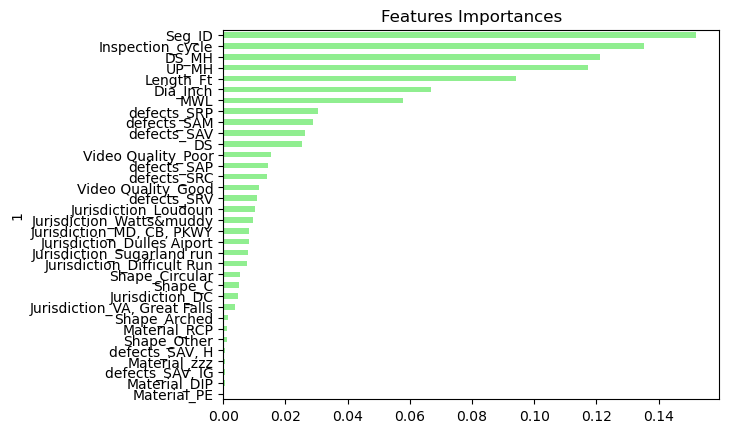

In [26]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)